<a href="https://colab.research.google.com/github/FarzanaAdiba/NICU-LOS-Classification/blob/main/automl_3col.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install autoviml

     |████████████████████████████████| 125 kB 8.8 MB/s 
     |████████████████████████████████| 356 kB 51.2 MB/s 
     |████████████████████████████████| 125 kB 65.3 MB/s 
     |████████████████████████████████| 166.7 MB 13 kB/s 
     |████████████████████████████████| 206 kB 70.1 MB/s 
     |████████████████████████████████| 22.3 MB 1.3 MB/s 
     |████████████████████████████████| 184 kB 49.9 MB/s 
     |████████████████████████████████| 67.4 MB 25 kB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491645 sha256=78ce692ce8deea54d75fc484526ea4fdd580f3ed1e0acbbaed446ef01be45d86
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186469 sha256=c2ee3f1f9377c1926a54dca7d060e31e54915d5cd773f763456a464fd7b2756e
  Stored in directory: /root/.cache/pip/wheels/e4/61/e7/2fc1ac8f306848fc66c6c013ab511f0a39ef4b1825b11363b2
Successfully bui

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/ThesisWork/auto_3col.csv"
df=pd.read_csv(path)
df.head()

,drug,label
0,"Send 500mg Vial-BASE-1.0, NEO*IV*Gentamicin-MA...",No
1,"Syringe (Neonatal) *D5W*-BASE-2.4, Send 500mg ...",No
2,"NEO*PO*Ferrous Sulfate Elixer-MAIN-0.1, Syring...",Yes
3,"Syringe (Neonatal) *D5W*-BASE-2.4, NEO*IV*Gent...",No
4,"NEO*IV*Gentamicin-MAIN-16.0, Send 500mg Vial-B...",No


In [ ]:
df['label'].value_counts()

No     1355
Yes     902
Name: label, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.30)

In [ ]:
from autoviml.Auto_NLP import Auto_NLP

Imported Auto_ViML version: 0.1.683. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.0.47.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


In [ ]:
nlp_column = 'drug'
target='label'

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

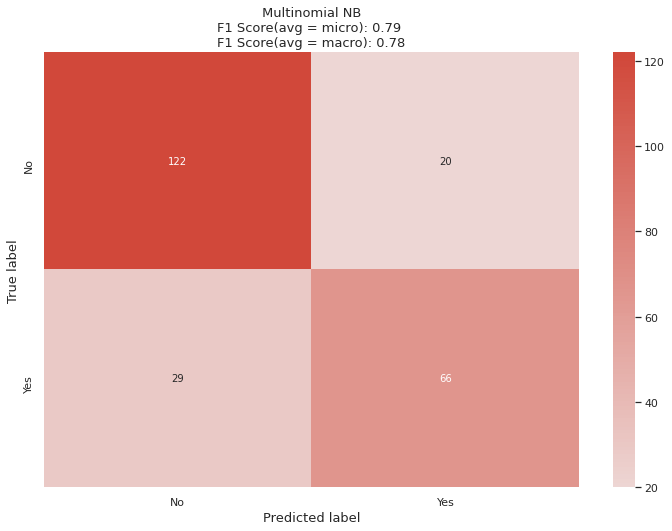

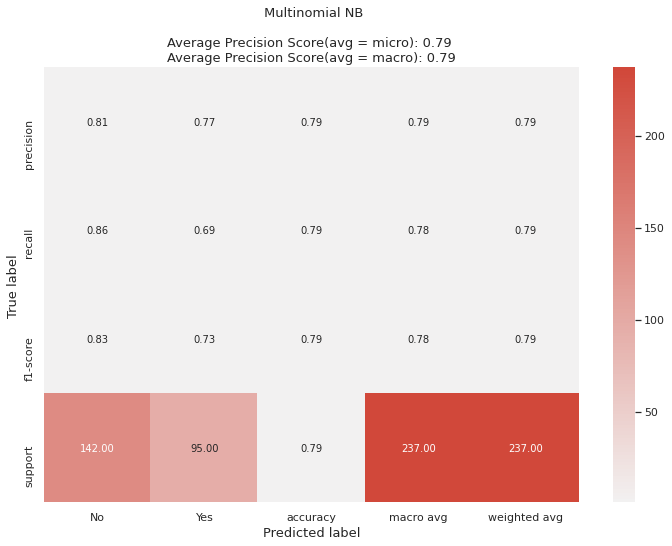

  Now transforming Train data to return as output...
    Time Taken for Expanding emojis and abbreviations in data = 2 seconds
        Time Taken for Processing text in data = 6 seconds
  Transforming Test data to return as output...
    Time Taken for Expanding emojis and abbreviations in data = 1 seconds
        Time Taken for Processing text in data = 3 seconds
Training best Auto_NLP Pipeline on full Train data...will be faster since best params are known
    Time Taken for Expanding emojis and abbreviations in data = 2 seconds
        Time Taken for Processing text in data = 6 seconds
    Returning best Auto_NLP pipeline to transform and make predictions on test data...
    Time Taken for Expanding emojis and abbreviations in data = 1 seconds
        Time Taken for Processing text in data = 3 seconds
Training completed. Time taken for Auto_NLP = 0.9 minutes
#########          A U T O   N L P  C O M P L E T E D    ###############################


In [ ]:
train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)

In [ ]:
size = int(0.75*df.shape[0])
train_df = df[:size]
test_df = df[size:]

In [ ]:
from autoviml.Auto_ViML import Auto_ViML

In [ ]:
target='label'

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (1743, 4)
    Training Set Memory Usage = 0.05 MB
Test Set Shape = (582, 4)
    Test Set Memory Usage = 0.02 MB
Single_Label Target: ['label']

################ Binary_Classification VISUALIZATION Started #####################
Random shuffling the data set before training
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
       Class  -> Counts -> Percent
          No:     804  ->   46.1%
         Yes:     939  ->   53.9%
String or Multi Class target: label transformed as follows: {'Yes': 0, 'No': 1}
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.014754
0:	learn: 0.5559541	test: 0.5501433	best: 0.5501433 (0)	total: 2.07ms	remaining: 14.5s


500:	learn: 0.6248207	test: 0.5444126	best: 0.5558739 (1)	total: 651ms	remaining: 8.45s
1000:	learn: 0.6707317	test: 0.5415473	best: 0.5558739 (1)	total: 1.31s	remaining: 7.86s
1500:	learn: 0.6829268	test: 0.5100287	best: 0.5558739 (1)	total: 2s	remaining: 7.35s
2000:	learn: 0.7008608	test: 0.4985673	best: 0.5558739 (1)	total: 2.68s	remaining: 6.7s
Stopped by overfitting detector  (2000 iterations wait)

bestTest = 0.5558739255
bestIteration = 1

Shrink model to first 2 iterations.
    Actual training time (in seconds): 3
###########  Single_Label  M O D E L   R E S U L T S #################
5-fold Cross Validation logloss = 0.5558739255014327
    CatBoost Best Parameters for Model: Iterations = 1, learning_rate = 0.01
Finding Best Threshold for Highest F1 Score...


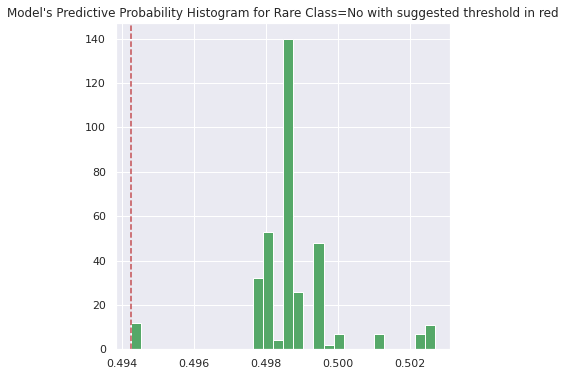

    Using threshold=0.5. However, 0.494 provides better F1=0.63 for rare class...
########################################################
CatBoost Model Prediction Results on Held Out CV Data Set:
    Regular Accuracy Score = 46.1%
Balanced Accuracy = 52.40% with Threshold = 0.50
Confusion Matrix:
[[176  12]
 [143  18]]
              precision    recall  f1-score   support

           0       0.55      0.94      0.69       188
           1       0.60      0.11      0.19       161

    accuracy                           0.56       349
   macro avg       0.58      0.52      0.44       349
weighted avg       0.57      0.56      0.46       349

Balanced Accuracy = 50.00% with Threshold = 0.49
Confusion Matrix:
[[  0 188]
 [  0 161]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       188
           1       0.46      1.00      0.63       161

    accuracy                           0.46       349
   macro avg       0.23      0.50      0.3

After multiple models, Ensemble Model Results:
Binary Class Model Metrics Report
#####################################################
    Accuracy          = 49.9%
    Balanced Accuracy = 49.3%
    Precision         = 45.3%
    Average Precision = 49.3%
    Recall            = 42.2%
    F1 Score          = 43.7%
#####################################################
              precision    recall  f1-score   support

           0       0.53      0.56      0.55       188
           1       0.45      0.42      0.44       161

    accuracy                           0.50       349
   macro avg       0.49      0.49      0.49       349
weighted avg       0.50      0.50      0.50       349

[[106  82]
 [ 93  68]]
#############################################################################
Single Model is better than Ensembling Models for this data set.


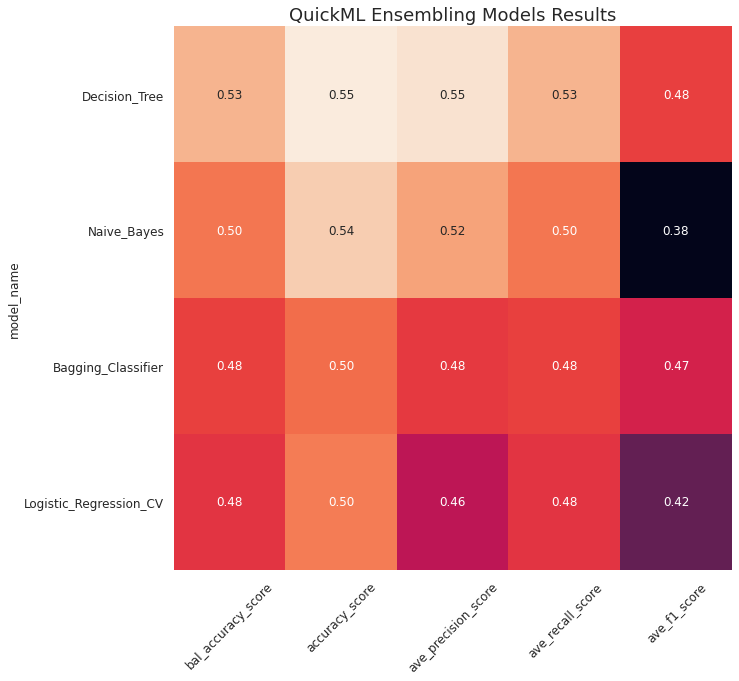

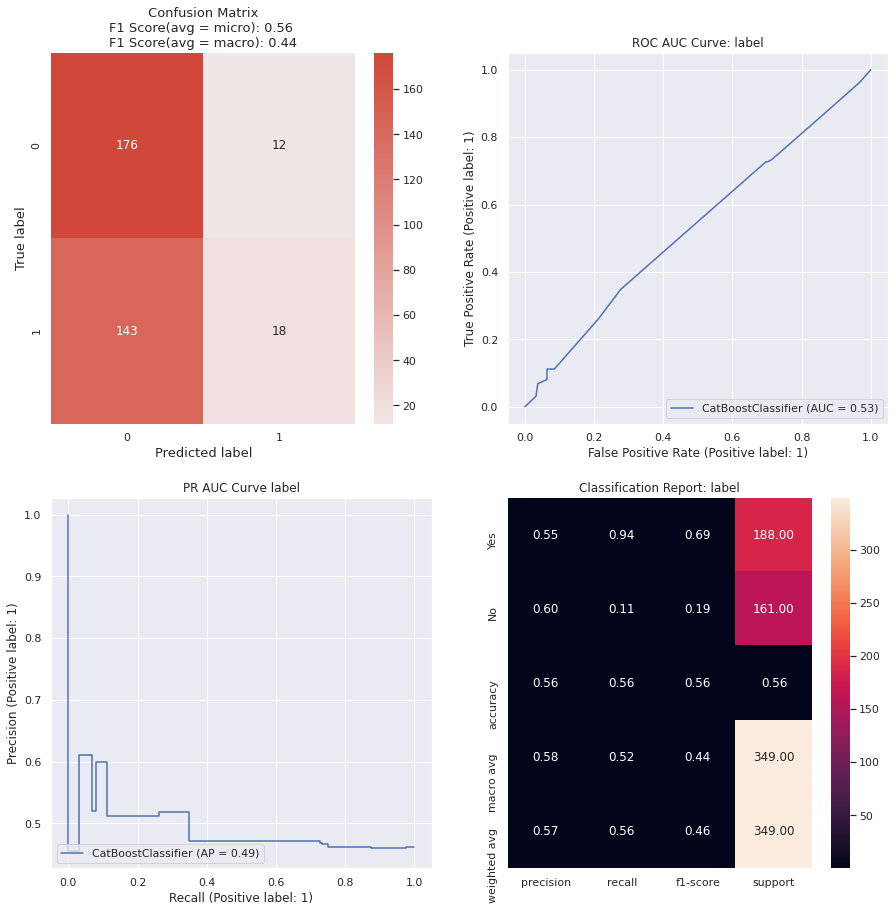

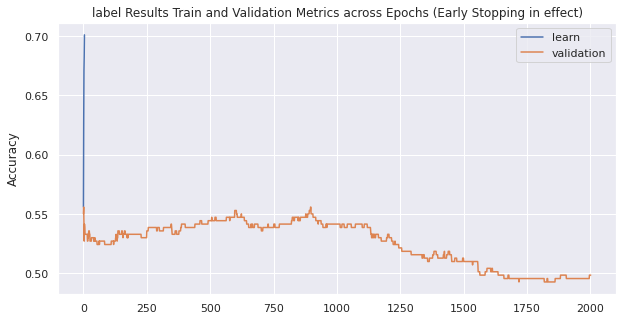

    Time taken for this Target (in seconds) = 7
    Binning_Flag set to False or there are no float vars in data set to be binned
    Setting best params for CatBoost model from Initial State since you cannot change params to a fitted Catboost model 
    Number of Categorical and Integer variables used in CatBoost training = 2
No MinMax scaling performed since scaling flag is set to false
#####   T R A I N I N G   M O D E L   O N    F U L L   T R A I N  D A T A  #############
0:	learn: 0.5582329	total: 1.19ms	remaining: 0us
     Actual Training time taken in seconds = 0
Training of models completed. Now starting predictions on test data...
    Making test Data predictions using regular Threshold = 0.500
    Calculating weighted average ensemble of 5 classifiers
########################################################
Completed Ensemble predictions on held out data
    Plotting Feature Importances to explain the output of model
############### P R E D I C T I O N  O N  T E S T   C O M P

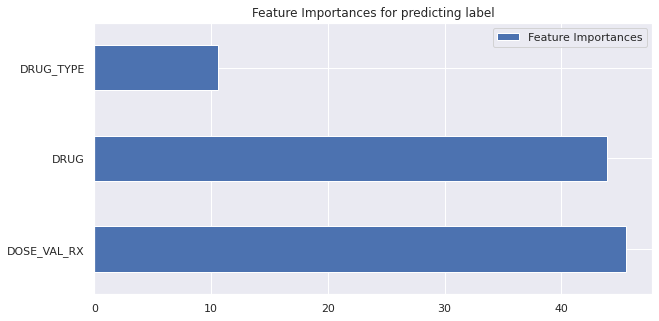

In [ ]:
m, feats, trainm, testm = Auto_ViML(train_df, target, test_df,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)